# Overview

Data: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/63jg-8b9z



In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
pd.options.display.max_columns=100

In [3]:
arrests = pd.read_csv(r'C:\Users\hchaw\Downloads\Arrest_Data_from_2010_to_Present.csv')
crime = pd.read_csv(r'C:\Users\hchaw\Downloads\Crime_Data_from_2010_to_Present.csv')

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066574 entries, 0 to 2066573
Data columns (total 28 columns):
DR_NO             int64
Date Rptd         object
DATE OCC          object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
dtypes: float64(8), int64(7), object(13)
memory usage: 441.5+ MB


In [4]:
crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524


# High Level Exploration

In [5]:
crime.shape

(2066574, 28)

In [6]:
def top_ten(col):
    return crime.groupby(col).size().sort_values(ascending=False).head(10)
def top_plot(col):
    crime.groupby(col).size().sort_values(ascending=False).head(10).plot(kind='bar')

In [7]:
# Top 10 Crimes
top_ten('Crm Cd Desc').to_clipboard()
#top_ten('Crm Cd Desc').plot(kind='bar')

In [8]:
# Top Areas with most crime
top_ten('AREA NAME').to_clipboard()

In [71]:
#Top Areas where a crime occurs
top_ten('Premis Desc')

Premis Desc
STREET                                          462256
SINGLE FAMILY DWELLING                          418600
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    259898
PARKING LOT                                     146654
SIDEWALK                                        103648
OTHER BUSINESS                                   94309
VEHICLE, PASSENGER/TRUCK                         78105
DRIVEWAY                                         41741
GARAGE/CARPORT                                   36825
RESTAURANT/FAST FOOD                             28480
dtype: int64

In [72]:
top_ten('Weapon Desc')

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    420977
VERBAL THREAT                                      57429
UNKNOWN WEAPON/OTHER WEAPON                        55990
HAND GUN                                           33344
SEMI-AUTOMATIC PISTOL                              12679
KNIFE WITH BLADE 6INCHES OR LESS                   12560
OTHER KNIFE                                         9550
UNKNOWN FIREARM                                     7742
VEHICLE                                             7094
REVOLVER                                            5509
dtype: int64

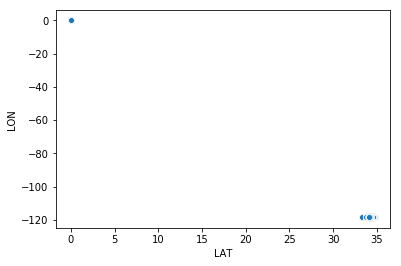

In [53]:
sns.scatterplot(x='LAT',y='LON',data=crime)

In [7]:
crime[['LAT',"LON"]].to_clipboard()

# Single Factorial Analysis 

In [12]:
# Difference of Date Reported and Date Occurred

In [ ]:
crime['Date Rptd'] =pd.to_datetime(crime['Date Rptd'])
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

In [ ]:
crime.info()

In [ ]:
np.average((crime['Date Rptd'] -crime['DATE OCC']).dt.days)

# Multi Factorial Analysis

In [ ]:
crime.columns

In [29]:
_ = crime.groupby(['AREA NAME','Crm Cd Desc'], as_index=False).aggregate({"DR_NO": "count"})

In [36]:
_["rank"] = _.groupby("AREA NAME")["DR_NO"].rank(method="max", ascending=False)

In [39]:
_[_["rank"]<=3].sort_values(["AREA NAME", "rank"], ascending=True)

,AREA NAME,Crm Cd Desc,DR_NO,rank
4,77th Street,BATTERY - SIMPLE ASSAULT,14853,1.0
123,77th Street,VEHICLE - STOLEN,12679,2.0
2,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11599,3.0
132,Central,BATTERY - SIMPLE ASSAULT,14408,1.0
235,Central,THEFT PLAIN - PETTY ($950 & UNDER),10526,2.0
148,Central,BURGLARY FROM VEHICLE,7480,3.0
272,Devonshire,BURGLARY,9496,1.0
273,Devonshire,BURGLARY FROM VEHICLE,8368,2.0
357,Devonshire,THEFT OF IDENTITY,8086,3.0
492,Foothill,VEHICLE - STOLEN,8001,1.0


In [23]:
crime[crime['Crm Cd Desc']=='BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM'].size

700

In [45]:
crime[crime["Crm Cd Desc"]=="INDECENT EXPOSURE"].groupby(["AREA NAME"]).size().sort_values(ascending=False)

AREA NAME
N Hollywood    259
Central        223
Mission        195
Rampart        194
Van Nuys       186
Olympic        181
Hollywood      180
Newton         174
Hollenbeck     173
Southwest      172
Foothill       159
Northeast      158
77th Street    158
West LA        144
West Valley    140
Topanga        140
Devonshire     140
Harbor         128
Wilshire       122
Pacific        117
Southeast       93
dtype: int64

# Ad Hoc

In [58]:
crime.groupby('Weapon Desc').size().sort_values(ascending=False)

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    420977
VERBAL THREAT                                      57429
UNKNOWN WEAPON/OTHER WEAPON                        55990
HAND GUN                                           33344
SEMI-AUTOMATIC PISTOL                              12679
KNIFE WITH BLADE 6INCHES OR LESS                   12560
OTHER KNIFE                                         9550
UNKNOWN FIREARM                                     7742
VEHICLE                                             7094
REVOLVER                                            5509
BOTTLE                                              4957
ROCK/THROWN OBJECT                                  4473
STICK                                               4473
CLUB/BAT                                            4289
BLUNT INSTRUMENT                                    4191
FOLDING KNIFE                                       4175
MACE/PEPPER SPRAY                                   3903
KITCHEN KNIFE      

In [83]:
crime[['Crm Cd Desc','Weapon Desc','DR_NO']].dropna().groupby(['Crm Cd Desc','Weapon Desc']).count().sort_values('DR_NO',ascending=False)

DR_NO
Crm Cd Desc                                        Weapon Desc                                           
BATTERY - SIMPLE ASSAULT                           STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  170700
INTIMATE PARTNER - SIMPLE ASSAULT                  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   99315
CRIMINAL THREATS - NO WEAPON DISPLAYED             VERBAL THREAT                                    42420
ROBBERY                                            STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   41502
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   13112
                                                   HAND GUN                                         12803
ROBBERY                                            HAND GUN                                         11301
BATTERY WITH SEXUAL CONTACT                        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   10600
BATTERY - SIMPLE ASSAULT                           UNKNOWN WEAPON/OTHER WEAPON                       9924
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     UNKNOWN WEAPON/OTHER WEAPON                       9892
INTIMATE PARTNER - AGGRAVATED ASSAULT              STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    9104
RAPE, FORCIBLE                                     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    8794
BURGLARY                                           UNKNOWN WEAPON/OTHER WEAPON                       7271
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 Y... STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    7248
THEFT, PERSON                                      STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    6866
BURGLARY FROM VEHICLE                              UNKNOWN WEAPON/OTHER WEAPON                       6390
ATTEMPTED ROBBERY                                  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    5823
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT            STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    5813
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     VEHICLE                                           5577
                                                   KNIFE WITH BLADE 6INCHES OR LESS                  5128
ROBBERY                                            SEMI-AUTOMATIC PISTOL                             4990
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     SEMI-AUTOMATIC PISTOL                             4588
BATTERY POLICE (SIMPLE)                            STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    4244
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     OTHER KNIFE                                       4028
                                                   UNKNOWN FIREARM                                   3562
INTIMATE PARTNER - SIMPLE ASSAULT                  UNKNOWN WEAPON/OTHER WEAPON                       3550
THEFT PLAIN - PETTY ($950 & UNDER)                 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3152
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     BOTTLE                                            3065
BRANDISH WEAPON                                    HAND GUN                                          3017
ROBBERY                                            KNIFE WITH BLADE 6INCHES OR LESS                  2965
...                                                                                                   ...
                                                   M1-1 SEMIAUTOMATIC ASSAULT RIFLE                     1
                                                   MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                  1
BURGLARY FROM VEHICLE, ATTEMPTED                   KNIFE WITH BLADE 6INCHES OR LESS                     1
RESISTING ARREST                                   SCREWDRIVER                                          1
                                                   REVOLVER                                             1
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT        RAZOR                